## MNIST DATASET DOWNLOAD
간단한 학습예제 전에 tensorflow가 제대로 설치되어 있는지, 버전이 몇인지 체크를 하기 위해 다음과 같이 작성한다

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
print(tf.__version__) # Tensorflow의 버전을 확인할 수 있다.

2.2.0


MNIST 데이터의 경우 keras의 dataset을 사용해 쉽게 다운로드 할 수 있다. 작성은 다음과 같다. 경로에 이미 설치된 동일 dataset이 있는 경우 다시 다운로드를 하진 않는다.

In [2]:
mnist = keras.datasets.mnist

# MNIST 데이터 로드 or 다운로드
(x_train, y_train),(x_test,y_test) = mnist.load_data()

len함수를 사용하면 데이터의 길이를 확인 할 수 있다. 다음과 같이 작성하면 각각의 데이터의 길이를 볼 수 있다.

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


len함수의 경우 데이터의 첫 번째 차원에 대한 길이만 확인 할 수 있다.
반면, 다음과 같이 작성하면 이미지의 전체 shape을 확인 할 수 있다.
x_train과 x_test는 입력 이미지 데이터이다.
shape을 보면 3가지를 확인 할 수 있는데 각각 (개수,높이,너비)를 나타내며 각각은 해당하는 픽셀의 값을 나타낸다.
y_train과 y_test는 정답 label이고 숫자가 몇 인지 나타내기 때문에 하나의 값이다.

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


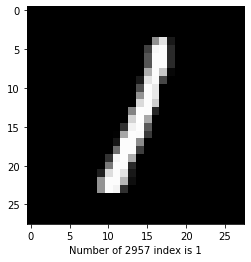

In [5]:
index = random.randint(0,len(x_train))
plt.imshow(x_train[index],cmap='gray')
plt.xlabel("Number of {} index is {}".format(index,y_train[index]))
plt.show()

현재 다운로드 받은 이미지 데이터는 0\~255값을 갖는데 딥러닝에서 layer를 거침에 따라 1이상의 값은 지수적으로 값이 증폭되기 때문에 0\~1의 값을 사용하는게 보통이다.
다음과 In[9]와 같이 작성하면 0\~1 값으로 정규화 할 수 있다.

In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## Sequenential Model
텐서플로우 케라스에서는 Sequential API라는 high level 라이브러리를 지원해준다.
다음의 예제는 keras의 Sequential API를 이용해 최초의 CNN이라고 불리는 LeNet을 설계한 예이다. 이처럼 high level의 API를 사용하면 짧은 길이로 빠르게 작성이 가능하다.

- `Conv2D(2차원 convolutional layer)` : (output_ch(or num), (kernel_h,kernel_w), activation= 'activate function', input_shape = (image_h,image_w,image_c)) # image shape에 batch size 없는 것 주의

- `Maxplling2D (2차원 Maxpooling)` : (kernel_h,kernel_w)

- `Flattend` : (h,w,c)를 1차원 array 변경한다(h x w x c).

- `Dense (fully connectec layer)` : (output_ch, activation='상동')

마지막 layer의 output 개수는 데이터셋의 분류 index 크기에 따라 다르게 설정해야한다.


In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


summary() 함수를 사용하면 설계한 모델에 대해 상세한 설명을 볼 수 있다.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

데이터를 학습시키기전에 In [8]에서 MNIST dataset이 gray scale 이미지이기 때문에 
input_shape=(28,28,1)으로 설정하였다.
하지만 현재 우리가 가지고 있는 데이터는 (num,h,w)의 shape을 가지고 있기 때문에 1차원이 모자르다.
아래와 같이 reshape 함수를 사용해 전체 shape에 변화를 주거나 np.expand_dims를 사용해 한 차원을 늘릴수 있다.

In [10]:
# Reshape
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

# Expand_dims

np_x_train = np.expand_dims(x_train,axis=-1) # -1을 하면 마지막 차원에 대해 수행한다.
np_x_test = np.expand_dims(x_test,axis=-1)

print("After Expand Dimension - np_x_train shape: {}".format(np_x_train.shape))
print("After Expand Dimension - np_x_test shape: {}".format(np_x_test.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)
After Expand Dimension - np_x_train shape: (60000, 28, 28, 1)
After Expand Dimension - np_x_test shape: (10000, 28, 28, 1)


학습을 진행하기 위해서는 optimizer를 선언해야 한다.
여기서는 adam optimizer를 사용한다.
optimizer가 선언되었으면 fit를 사용해 훈련 이미지와 정답 label을 인자로 넘겨 학습을 진행한다.

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2132 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0673 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0495 - accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0389 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.014

학습 데이터에서 최종 accuracy를 보면 99.58%라는 높은 정확도를 기록했다.
하지만 훈련 데이터에서 이루어진 학습은 연습문제를 잘 푸는 것과 동일하다.
우리는 훈련한 모델을 실제 시험에 해당하는 x_test 데이터에서 높은 정확도를 기록해야 한다.
test 데이터에서 모델의 정확도를 측정하는 방법은 다음과 같이 evaluate 함수를 사용하면 된다. evaluate에서는 2가지를 return 받을 수 있는데 첫 번째는 우리가 정의한 loss function의 값이고 accuracy 전체 데이터에 대해 맞춘 개수의 비율이다.

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0364 - accuracy: 0.9893
test_loss: 0.03640367090702057 
test_accuracy: 0.989300012588501


## 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자
model.evaluate() 대신 model.predict()를 사용하면 model 이 입력값을 보고 실제로 추론한 확률분포에 대해 출력할 수 있다.
결과를 print해 보면 다음과 같이 array가 나오는데 이는 각각 [0에 대한 확률,1에 대한 확률,..., 9에 대한 확률]을 뜻한다.

In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.9397451e-11 7.9532339e-11 9.7254474e-07 4.5244807e-08 1.7011318e-09
 6.4175916e-13 6.6574391e-16 9.9999881e-01 1.1608353e-08 1.3424606e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


실제로 7인지에 대해 확인하기 위해서는 matplotlib을 사용하면된다.

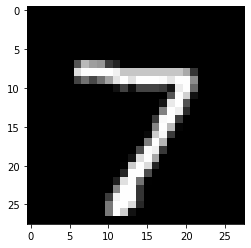

In [14]:
plt.imshow(x_test[idx],cmap='gray')
plt.show()

정답과 예측된 값이 다른 경우 다음과 같이 작성하면 확인할 수 있다.

예측확률분포: [4.1900101e-05 9.7405338e-01 2.2833545e-03 2.0673397e-08 4.9978034e-03
 5.9448631e-08 1.8607635e-02 8.4691919e-06 7.3176575e-06 2.6883443e-08]
라벨: 6, 예측결과: 1


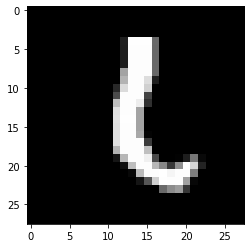

예측확률분포: [9.1967311e-12 5.8675232e-05 6.6684616e-01 3.1938665e-02 6.8746436e-07
 7.6033548e-13 1.2075346e-15 2.9939356e-01 2.3857057e-05 1.7383896e-03]
라벨: 7, 예측결과: 2


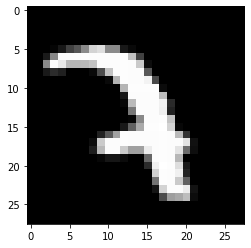

예측확률분포: [2.7486814e-07 9.6847779e-01 8.7136775e-03 1.5045678e-04 9.8921556e-04
 1.3519572e-07 2.8031352e-05 2.1619080e-02 1.6811973e-05 4.5770403e-06]
라벨: 7, 예측결과: 1


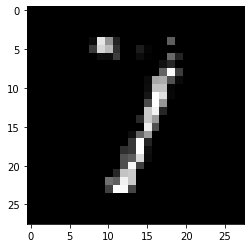

예측확률분포: [4.89199685e-08 9.65211630e-01 1.23075615e-05 1.07160713e-06
 1.26358937e-04 8.19254442e-10 2.48715319e-11 3.42420526e-02
 1.63730947e-04 2.42947979e-04]
라벨: 7, 예측결과: 1


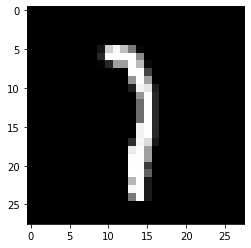

예측확률분포: [5.8001245e-08 3.6234787e-01 2.6509467e-01 1.2264707e-01 1.7990474e-02
 3.1744319e-04 9.2693690e-06 2.0293407e-01 7.2774194e-05 2.8586308e-02]
라벨: 7, 예측결과: 1


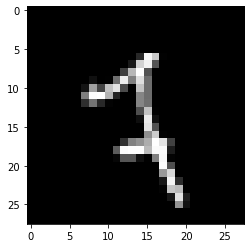

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap='gray')
    plt.show()

## 더 좋은 네트워크 만들어보기
현재 설계된 모델에서 가능한 하이퍼 파라미터는 각 layer의 output 크기, epoch, kernel의 크기 등등이 있다. 이를 조절해서 더 높은 값을 만들어보자.

In [16]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# 가위,바위,보 분류기 만들기

## 데이터 준비

구글의 teachable machine 사이트에서 쉽게 만들 수 있다.
https://teachablemachine.withgoogle.com/
webcam으로 찍어서 우측 상단의 ...을 누르면 샘플들을 다운 받을 수 있다.

rock_scissor_paper 폴더를 만들고 각각의 class에 대해 경로를 지정해 주었다.
```
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper
```

구글에서 다운로드 받은 데이터의 size는 224x224인데 현재 설계된 모델에 맞게 이미지를 resize해야한다.

In [17]:
!pip install pillow   
from PIL import Image
import os, glob


In [18]:
# image_dir_path = os.getenv("HOME")+"/Downloads/train/"
# image_dir_path=glob.glob(image_dir_path+'*')
# print(image_dir_path)
# images = [glob.glob(image_dir_path[i]+"/*.jpg") for i in range(len(image_dir_path))]

# target_size=(28,28)

# for i in range(len(image_dir_path)):
#     for img in images[i]:
#         old_img=Image.open(img)
#         new_img=old_img.resize(target_size,Image.ANTIALIAS)
#         new_img.save(img,"JPEG")

['/home/aiffel0042/Downloads/train/paper', '/home/aiffel0042/Downloads/train/scissor', '/home/aiffel0042/Downloads/train/rock']


In [19]:
# jisu_dir_path = os.getenv("HOME")+"/Downloads/rock_scissor_paper/"
# my_dir_path = os.getenv("HOME")+"/Downloads/train/"
# class_folder = ["rock/","scissor/","paper/"]

# images = [glob.glob(jisu_dir_path + class_folder[i]+"*.jpg") for i in range(3)]
# print(images)
# offset = 100
# target_size=(28,28)

# for i in range(3):
#     for image in images[i]:
#         print(image)
#         out_num = str(offset+int(image.split('/')[-1].split('.')[0]))
#         if not os.path.exists(my_dir_path+class_folder[i]):
#             os.makedirs(my_dir_path+class_folder[i])
#         out_path = my_dir_path+class_folder[i]+out_num+'.jpg'
#         old_img=Image.open(image)
#         new_img=old_img.resize(target_size,Image.ANTIALIAS)
#         new_img.save(out_path,"JPEG")

아래의 input_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받고 클래스 별로 label을 부여한다.

In [20]:
import numpy as np
np.random.seed(1337)
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras


def load_data(img_path,number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs/255.0, labels

train_dir_path = os.getenv("HOME") + "/Downloads/train"
(x_train, y_train)=load_data(train_dir_path,1200)
test_dir_path = os.getenv("HOME") + "/Downloads/test"
(x_test, y_test)=load_data(test_dir_path,300)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


먼저 이전과 동일하게 모델을 설계하고 결과를 확인해본다.
현재 데이터는 데이터당 3차원의 정보를 가지고 있으므로 reshape을 하지 않아도 된다.

In [21]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [22]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 4s 96ms/step - loss: 1.0978 - accuracy: 0.3867
Epoch 2/10
38/38 [==============================] - 0s 1ms/step - loss: 1.0589 - accuracy: 0.5067
Epoch 3/10
38/38 [==============================] - 0s 1ms/step - loss: 0.9715 - accuracy: 0.5575
Epoch 4/10
38/38 [==============================] - 0s 1ms/step - loss: 0.9081 - accuracy: 0.5608
Epoch 5/10
38/38 [==============================] - 0s 1ms/step - loss: 0.8558 - accuracy: 0.5975
Epoch 6/10
38/38 [==============================] - 0s 1ms/step - loss: 0.7968 - accuracy: 0.6350
Epoch 7/10
38/38 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.6983
Epoch 8/10
38/38 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.7367
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7492
Epoch 10/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7783


In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 1.5498 - accuracy: 0.4067
test_loss: 1.5498270988464355 
test_accuracy: 0.40666666626930237


약 40 정도의 정확도가 나오는데 데이터 augmentation과 model의 변경을 통해 정확도를 올릴 것이다.

아래와 같이 keras의 DataGenerator를 사용하면 이미지를 augmentation할 수 있다.

- `width_shift_range` : 좌우로 이동
- `height_shift_range` : 상하로 이동
- `zoom_range` : 줌 인/아웃
- `ratation_range` : 회전
- `horizontal_flip` : 좌우 반전

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
width_shift_range = 0.1,
height_shift_range = 0.1,
    zoom_range = [0.8, 1.2],
    rotation_range = 10,
horizontal_flip=True)


augmentation을 했음에도 train data가 너무 작아 한 층 씩만 추가했다.
n_channel의 경우에도 학습데이터 대비 파라미터의 양이 너무 많아져 overffiting이 발생한다.

In [25]:

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20
n_model=keras.models.Sequential()
n_model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
n_model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', padding='same'))

n_model.add(keras.layers.MaxPool2D(2,2))
n_model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu',padding='same'))
n_model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding='same'))
n_model.add(keras.layers.MaxPooling2D((2,2)))

n_model.add(keras.layers.Flatten())
n_model.add(keras.layers.Dense(n_dense, activation='relu'))
n_model.add(keras.layers.Dense(3, activation='softmax'))

n_model.summary()
n_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

data generator를 사용할때는 아래와 같이 fit이 아닌 fit_generator 함수를 사용한다.

In [26]:
# 모델 훈련
n_model.fit_generator(datagen.flow(x_train, y_train,batch_size= 100),steps_per_epoch = x_train.shape[0]//100,epochs=n_train_epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
12/12 [==============================] - 0s 22ms/step - loss: 1.1019 - accuracy: 0.3283
Epoch 2/20
12/12 [==============================] - 0s 24ms/step - loss: 1.0996 - accuracy: 0.3583
Epoch 3/20
12/12 [==============================] - 0s 24ms/step - loss: 1.0950 - accuracy: 0.3967
Epoch 4/20
12/12 [==============================] - 0s 26ms/step - loss: 1.0844 - accuracy: 0.4142
Epoch 5/20
12/12 [==============================] - 0s 25ms/step - loss: 1.0639 - accuracy: 0.4542
Epoch 6/20
12/12 [==============================] - 0s 24ms/step - loss: 1.0515 - accuracy: 0.4467
Epoch 7/20
12/12 [==============================] - 0s 25ms/step - loss: 1.0193 - accuracy: 0.4900
Epoch 8/20
12/12 [==============================] - 0s 27ms/step - loss: 0.9858 - accuracy: 0.5350
Epoch 9/20
12/12 [==============================] - 0s 25ms/step - loss: 0.9625 - accuracy: 0.5358
Epoch 10/20
12/12 [==============

결과는 아래와 같다.

In [27]:
test_loss, test_accuracy = n_model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 3s - loss: 0.8786 - accuracy: 0.6167
test_loss: 0.878575325012207 
test_accuracy: 0.6166666746139526


### 개선사항
- #### data augment 
- #### conv layer 2개 추가 (더 깊은 네트워크, augmentation을 해서 어느정도 추가 가능할것이라고 판단함)

